# Machine Learning Model build up for a Binary Classification containing Machine Failure dataset


<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Machine_Failure/Pics/predictive_model.jpg?raw=true" />


As Industry 4.0 continues to generate media attention, many companies are struggling with the realities of AI implementation. Indeed, the benefits of predictive maintenance such as helping determine the condition of equipment and predicting when maintenance should be performed, are extremely strategic. Needless to say that the implementation of ML-based solutions can lead to major cost savings, higher predictability, and the increased availability of the systems.

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Machine_Failure/Pics/prediction.png?raw=true"/>

---

In predictive maintenance scenarios, data is collected over time to monitor the state of equipment. The goal is to find patterns that can help predict and ultimately prevent failures.

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Machine_Failure/Pics/reliable%20plant.gif?raw=true"/>

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Machine_Failure/Pics/ptof1.png?raw=true"/>

## Table of Contents

1. [Problem Statement](#section1)<br>

2. [Data Loading and Description](#section2)<br>

3. [Preprocessing](#section3)<br>
    - 3.1 [Importing packages](#section301)<br>
    - 3.2 [Label Encoding for Categorical data](#section302)<br>
    - 3.3 [Binary Class Identification : Imbalanced dataset](#section303)<br>
    - 3.4 [Feature Corelations](#section304)<br>

4. [Handling Imbalanced data](#section4)<br>
    - 4.1 [Train & Test split](#section401)<br>
    - 4.2 [SMOTE : Oversampling technique adopted on Train data](#section402)<br>
  
5. [Logistic Regression](#section5)<br>
    - 5.1 [Build Model](#section501)<br>
    - 5.2 [Prediction using Model](#section502)<br> 
    - 5.3 [Model Evaluation](#section503)<br> 
    
6. [Decision Tree : Gini](#section6)<br>
    - 6.1 [Build Model](#section601)<br>
    - 6.2 [Prediction using Model](#section602)<br> 
    - 6.3 [Model Evaluation](#section603)<br>
	
7. [Decision Tree : Entropy](#section7)<br>
    - 7.1 [Build Model](#section701)<br>
    - 7.2 [Prediction using Model](#section702)<br> 
    - 7.3 [Model Evaluation](#section703)<br>
	
8. [Random Forest : Gini](#section8)<br>
    - 8.1 [Build Model](#section801)<br>
    - 8.2 [Prediction using Model](#section802)<br> 
    - 8.3 [Model Evaluation](#section803)<br>
	
9. [Random Forest : Entropy](#section9)<br>
    - 9.1 [Build Model](#section901)<br>
    - 9.2 [Prediction using Model](#section902)<br> 
    - 9.3 [Model Evaluation](#section903)<br>
	
10. [Decision Tree with Class weight and Entropy](#section10)<br>
    - 10.1 [Build Model](#section1001)<br>
    - 10.2 [Prediction using Model](#section1002)<br> 
    - 10.3 [Model Evaluation](#section1003)<br>
	
11. [RandomSearchCV on RF](#section11)<br>
    - 11.1 [Build Model](#section1101)<br>
    - 11.2 [Prediction using Model](#section1102)<br> 
    - 11.3 [Model Evaluation](#section1103)<br>
	
12. [Model Evaluation among all the employed model](#section12)<br>
    - 12.1 [Precision-Recall Curve and Classification Report](#section1201)<br>
    - 12.2 [ROC-AUC Curve and compare against no skill model](#section1202)<br>
    - 12.3 [Probability Value comparison of test dataset among all models](#section1203)<br>
	
13. [Cross Validation and Prediction with selected model](#section13)<br>

14. [Conclusion](#section14)<br>

### 1. Problem Statement

The goal is to __predict failure__ of __machine__ using __different classification models__.

### 2. Data Loading and Description

Source of the data:

https://bigml.com/user/czuriaga/gallery/dataset/587d062d49c4a16936000810

- The dataset consists of the information about all operating parameters including Operator information also. 
- The dataset comprises of __8,784 observations of 28 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Date          | Date, time of recording data in 1 hr interval                                    | 
| Temperature   | Temperature of atmosphere                                               |  
| Humidity      | Humidity of atmosphere                                           | 
| Operator      | Operator number                                         |   
| Measure 1 to 15| Parameters captured                                          |
| Hours Since Previous Failure           | hrs. from last failure                                          |
| Failure         | failure happened - Yes or No |
| Date.year,month,day,hrs,min,sec         | date-time parameters in detail|

### 3. Preprocessing

#### 3.1 Importing packages                                          

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                       
%matplotlib inline
sns.set()
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
'''
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


"\nimport warnings\nwarnings.filterwarnings('ignore')\n\nfrom subprocess import check_output\n"

In [2]:
file1="https://raw.githubusercontent.com/pathakchiranjit/Machine-Learning/main/Classification/Machine_Failure/Dataset/machine_failure_data.csv"
df_all = pd.read_csv(file1)  # (encoding='ISO-8859-1',sep="|") not required here
df_all.head(3)

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No,2016,1,1,5,0,0,0
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No,2016,1,1,5,1,0,0
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No,2016,1,1,5,2,0,0


In [3]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df_all)

,Total,Percent
﻿Date.second,0,0.0
﻿Date.minute,0,0.0
Temperature,0,0.0
Humidity,0,0.0
Operator,0,0.0
Measure1,0,0.0
Measure2,0,0.0
Measure3,0,0.0
Measure4,0,0.0
Measure5,0,0.0


In [4]:
!pip install -U dtale

     |████████████████████████████████| 7.7MB 9.2MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 1.8MB 44.1MB/s 
     |████████████████████████████████| 13.2MB 330kB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 74.6MB 68kB/s 
     |████████████████████████████████| 645kB 49.6MB/s 
     |████████████████████████████████| 194kB 32.3MB/s 
     |████████████████████████████████| 1.0MB 44.0MB/s 
     |████████████████████████████████| 3.5MB 41.7MB/s 
     |████████████████████████████████| 194kB 48.4MB/s 
     |████████████████████████████████| 1.8MB 43.1MB/s 
     |████████████████████████████████| 358kB 46.2MB/s 
  Created wheel for dash: filename=dash-1.18.1-cp36-none-any.whl size=83681 sha256=4166b24e8e50059abca022039ab1e5821d844a6fba577a111af217d9d062a1f1
  Stored in directory: /root/.cache/pip/wheels/eb/56/fb/79b2169ce9fcb79753e

In [5]:
import dtale
import pandas as pd
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [6]:
df = df_all.copy()

In [7]:
dtale.show(df, ignore_duplicate=True)

https://76vlqxpc8rv-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [8]:
data = df_all.copy()

In [9]:
data.columns

Index(['Date', 'Temperature', 'Humidity', 'Operator', 'Measure1', 'Measure2',
       'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8',
       'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13',
       'Measure14', 'Measure15', 'Hours Since Previous Failure', 'Failure',
       '﻿Date.year', '﻿Date.month', '﻿Date.day-of-month', '﻿Date.day-of-week',
       '﻿Date.hour', '﻿Date.minute', '﻿Date.second'],
      dtype='object')

In [10]:
data.drop(data.columns[[0, 21, 22,23,24,25,26,27]], axis = 1, inplace = True)
data.head(3)

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure
0,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No


#### 3.2 Label Encoding for Categorical data                                          

In [11]:
from sklearn.preprocessing import LabelEncoder
data['Target_label_encoded']= LabelEncoder().fit_transform(data.Failure)
data.drop(['Failure'], axis=1,inplace=True)
data.head(3)

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Target_label_encoded
0,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,0
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,0
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,0


In [12]:
data_with_dummies = pd.get_dummies(data, columns=['Operator'], drop_first=True)
data_with_dummies.head()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Target_label_encoded,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8
0,67,82,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,0,0,0,0,0,0,0,0
1,68,77,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,0,0,0,0,0,0,0,0
2,64,76,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,0,0,0,0,0,0,0,0
3,63,80,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,0,0,0,0,0,0,0,0
4,65,81,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,0,0,0,0,0,0,0,0


In [13]:
columns = data_with_dummies.columns.tolist()
range(len(columns))
columns[2]

'Measure1'

In [14]:
columns = data_with_dummies.columns.tolist()
col=[]
for c in columns:
    if c != 'Target_label_encoded':
      col.append(c)
target ='Target_label_encoded'
X=data_with_dummies[col]
y=data_with_dummies[target]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (8784, 25)
Shape of y: (8784,)


#### 3.3 Binary Class Identification : Imbalanced dataset                                          

0    8703
1    81  
Name: Target_label_encoded, dtype: int64

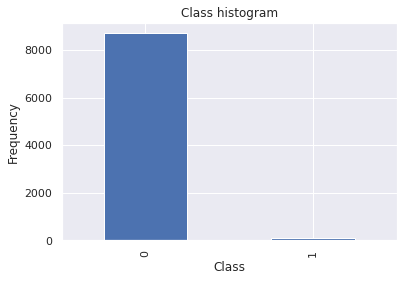

In [15]:
pd.value_counts(y).plot.bar()
plt.title('Class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y.value_counts()

Data Imbalanced observed

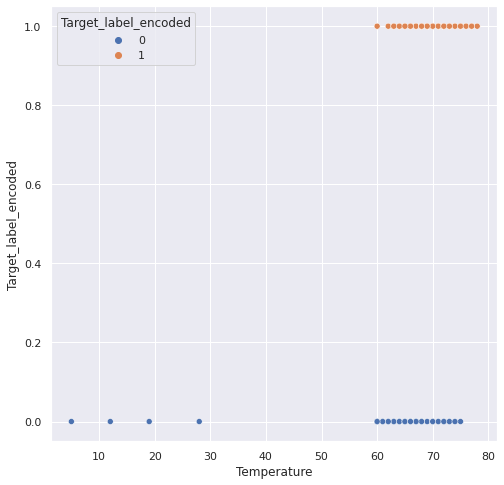

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = data_with_dummies, x='Temperature', y='Target_label_encoded',hue = 'Target_label_encoded')

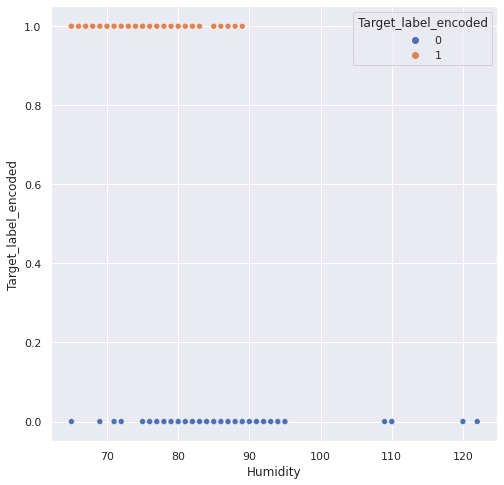

In [17]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = data_with_dummies, x='Humidity', y='Target_label_encoded',hue = 'Target_label_encoded')

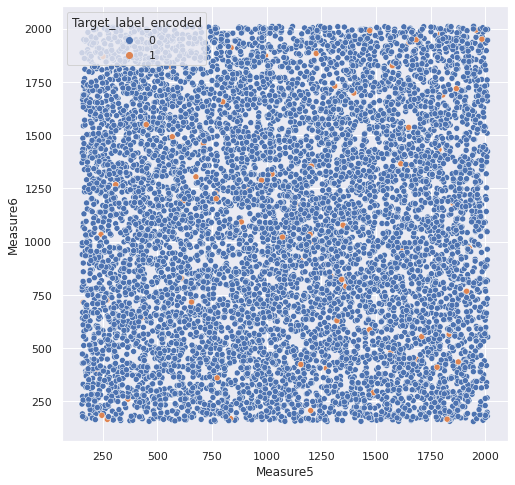

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = data_with_dummies, x='Measure5', y='Measure6',hue = 'Target_label_encoded')

#### 3.4 Feature Corelations                                          

In [19]:
df_lr = data.copy()

Text(0.5, 1.0, 'Correlation between features')

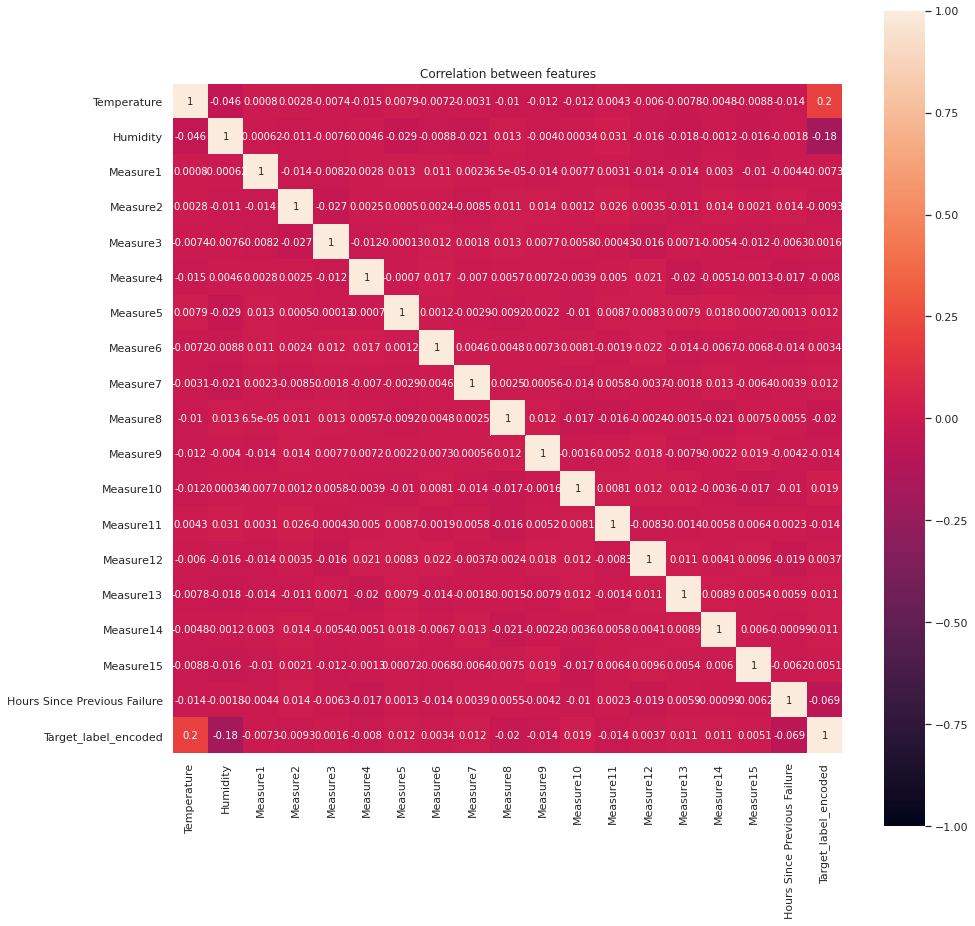

In [20]:
corr = df_lr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, square = True,annot= True, vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

Features are not correlated among each others; 
Temperature and Humidity is mildly correlated with Target

### 4. Handling Imbalanced data

#### 4.1 Train & Test split                                          

In [21]:
from sklearn.model_selection import train_test_split
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X, y, test_size=0.20, random_state=1)

In [22]:
print('Train cases as below')
print('X_train shape: ',X_trainlr.shape)
print('y_train shape: ',y_trainlr.shape)
print('\nTest cases as below')
print('X_test shape: ',X_testlr.shape)
print('y_test shape: ',y_testlr.shape)

Train cases as below
X_train shape:  (7027, 25)
y_train shape:  (7027,)

Test cases as below
X_test shape:  (1757, 25)
y_test shape:  (1757,)


0    6960
1    67  
Name: Target_label_encoded, dtype: int64

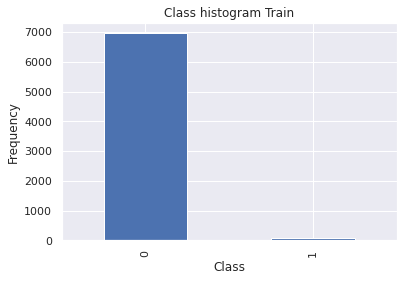

In [23]:
pd.value_counts(y_trainlr).plot.bar()
plt.title('Class histogram Train')
plt.xlabel('Class')
plt.ylabel('Frequency')
y_trainlr.value_counts()

0    1743
1    14  
Name: Target_label_encoded, dtype: int64

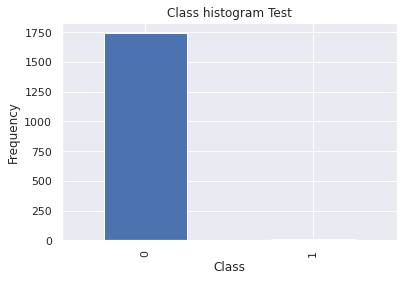

In [24]:
pd.value_counts(y_testlr).plot.bar()
plt.title('Class histogram Test')
plt.xlabel('Class')
plt.ylabel('Frequency')
y_testlr.value_counts()

#### 4.2 SMOTE : Oversampling technique adopted on Train data                                          

In [25]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [26]:
smt = SMOTE()
X_osmpl,y_osmpl=smt.fit_sample(X_trainlr, y_trainlr)
np.bincount(y_osmpl)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



array([6960, 6960])

1    6960
0    6960
dtype: int64

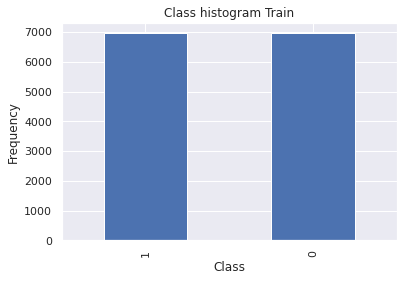

In [27]:
pd.value_counts(y_osmpl).plot.bar()
plt.title('Class histogram Train')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_osmpl)

In [28]:
df_Xosmpl = pd.DataFrame(data = X_osmpl, columns = col)
df_Xosmpl.head(3)

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8
0,63,82,1189,1,2,1336,1335,1239,1375,586,191,682,1363,714,1271,1429,943,45,0,1,0,0,0,0,0
1,60,79,1948,1,0,913,344,626,253,1830,1737,1598,406,493,1082,1683,1182,337,0,0,0,0,0,0,0
2,67,78,364,1,0,594,240,585,1795,580,1578,719,447,171,1808,1686,753,465,0,0,0,0,0,0,1


In [29]:
df_yosmpl=pd.DataFrame(data = y_osmpl)
df_yosmpl.columns=['Target_label_encoded']
df_yosmpl.head(3)

,Target_label_encoded
0,0
1,0
2,0


In [30]:
df_train=df_Xosmpl.join(df_yosmpl, lsuffix="_left", rsuffix="_right")
df_train.head(3)

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,Target_label_encoded
0,63,82,1189,1,2,1336,1335,1239,1375,586,191,682,1363,714,1271,1429,943,45,0,1,0,0,0,0,0,0
1,60,79,1948,1,0,913,344,626,253,1830,1737,1598,406,493,1082,1683,1182,337,0,0,0,0,0,0,0,0
2,67,78,364,1,0,594,240,585,1795,580,1578,719,447,171,1808,1686,753,465,0,0,0,0,0,0,1,0


### 5. Logistic Regression

#### 5.1 Build Model                                          

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred_train = logreg.predict(df_Xosmpl)

In [33]:
y_pred_train

array([0, 0, 0, ..., 1, 1, 1])

#### 5.2 Prediction using Model                                          

In [34]:
y_pred_test = logreg.predict(X_testlr)

In [35]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
test_predictions = X_testlr.copy()

In [37]:
test_predictions['actual'] = y_testlr
test_predictions['predicted'] = y_pred_test
test_predictions

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,actual,predicted
6279,67,82,1744,3,2,644,1599,1514,1957,1169,303,1468,1255,942,835,1308,815,262,0,1,0,0,0,0,0,0,0
1005,68,81,875,3,0,1964,1572,1325,220,1317,1119,946,2000,1290,1975,368,1812,338,0,0,0,0,0,0,1,0,0
8651,67,83,162,3,2,1302,438,691,1262,1448,1219,1025,1320,1652,571,1540,1272,58,0,1,0,0,0,0,0,0,0
5408,64,89,857,1,2,525,1789,1689,1903,1603,391,882,1609,1282,1930,217,381,290,0,1,0,0,0,0,0,0,0
7136,64,83,815,3,0,875,1287,1969,398,1067,1123,778,1036,1827,1209,1862,599,246,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,68,82,1047,3,0,1389,1242,1388,1762,1807,1386,1130,1564,1397,555,970,411,532,0,0,1,0,0,0,0,0,0
8524,61,77,587,3,2,1141,345,649,369,1179,1607,1160,1053,1723,1149,852,1308,342,1,0,0,0,0,0,0,0,0
2379,60,85,1568,2,1,555,1456,1572,1671,754,1837,475,370,738,1545,1727,1857,547,0,0,0,0,0,0,0,0,0
5997,67,82,1079,2,2,1380,1433,1248,1010,470,1611,1013,1845,1110,1612,1582,515,9,0,0,0,1,0,0,0,0,0


#### 5.3 Model Evaluation                                          

In [38]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_testlr,y_pred_test))
print('Accuracy score for train data is:', accuracy_score(y_osmpl,y_pred_train))

Accuracy score for test data is: 0.9277177006260672
Accuracy score for train data is: 0.9033045977011495


In [39]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_testlr, y_pred_test)
print(conf_matrix)


[[1620  123]
 [   4   10]]


In [40]:
from sklearn.metrics import recall_score
def log():
    recall1 = recall_score(y_testlr, y_pred_test)
    print('Recall score for test data is:', recall1)
    return recall1
recall1 = log()

Recall score for test data is: 0.7142857142857143


In [41]:
from sklearn.metrics import recall_score
def log():
    recall1 = recall_score(y_osmpl,y_pred_train)
    print('Recall score for train data is:', recall1)
    return recall1
recall1 = log()

Recall score for train data is: 0.8862068965517241


In [42]:
from sklearn.metrics import classification_report
def lr():
    print(classification_report(y_testlr, y_pred_test))
lr()

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1743
           1       0.08      0.71      0.14        14

    accuracy                           0.93      1757
   macro avg       0.54      0.82      0.55      1757
weighted avg       0.99      0.93      0.96      1757



In [43]:
from sklearn.metrics import classification_report
def lr():
    print(classification_report(y_osmpl,y_pred_train))
lr()

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6960
           1       0.92      0.89      0.90      6960

    accuracy                           0.90     13920
   macro avg       0.90      0.90      0.90     13920
weighted avg       0.90      0.90      0.90     13920



In [44]:
c_matrix = pd.DataFrame(confusion_matrix(y_testlr, y_pred_test))

print(c_matrix)

      0    1
0  1620  123
1  4     10 


In [45]:
c_matrix.index = ['Actual not Failed','Actual Failed']
c_matrix.columns = ['Predicted not Failed','Predicted Failed']
print(c_matrix)

                   Predicted not Failed  Predicted Failed
Actual not Failed  1620                  123             
Actual Failed      4                     10              


In [46]:
logreg.coef_ 

array([[ 4.40120408e-01, -3.86069476e-01,  2.57670636e-04,
        -1.46414259e-01, -3.04347110e-02, -9.89390517e-05,
        -1.65009709e-04,  9.22659315e-05,  3.55766891e-04,
         9.79860365e-04, -1.09390356e-03,  5.51338583e-04,
         5.51265970e-04, -9.91166933e-06,  2.42333651e-04,
         2.18132860e-04,  1.23327210e-04, -6.26166168e-03,
        -4.12449212e-02, -2.16327809e-02, -2.11278157e-02,
        -1.90630156e-02, -1.93440594e-02, -1.79954364e-02,
        -2.14693293e-02]])

In [47]:
len(logreg.coef_[0])

25

In [48]:
len(df_Xosmpl.columns)

25

In [49]:
df_Xosmpl.columns

Index(['Temperature', 'Humidity', 'Measure1', 'Measure2', 'Measure3',
       'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9',
       'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14',
       'Measure15', 'Hours Since Previous Failure', 'Operator_Operator2',
       'Operator_Operator3', 'Operator_Operator4', 'Operator_Operator5',
       'Operator_Operator6', 'Operator_Operator7', 'Operator_Operator8'],
      dtype='object')

In [50]:
test_predictions['intercept'] = logreg.intercept_[0]

In [51]:
for i in range(0,len(logreg.coef_[0])):
    test_predictions[df_Xosmpl.columns[i] + "_coef"] = logreg.coef_[0][i]

In [52]:
test_predictions

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,...,Temperature_coef,Humidity_coef,Measure1_coef,Measure2_coef,Measure3_coef,Measure4_coef,Measure5_coef,Measure6_coef,Measure7_coef,Measure8_coef,Measure9_coef,Measure10_coef,Measure11_coef,Measure12_coef,Measure13_coef,Measure14_coef,Measure15_coef,Hours Since Previous Failure_coef,Operator_Operator2_coef,Operator_Operator3_coef,Operator_Operator4_coef,Operator_Operator5_coef,Operator_Operator6_coef,Operator_Operator7_coef,Operator_Operator8_coef
6279,67,82,1744,3,2,644,1599,1514,1957,1169,303,1468,1255,942,835,1308,815,262,0,1,0,0,0,0,0,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469
1005,68,81,875,3,0,1964,1572,1325,220,1317,1119,946,2000,1290,1975,368,1812,338,0,0,0,0,0,0,1,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469
8651,67,83,162,3,2,1302,438,691,1262,1448,1219,1025,1320,1652,571,1540,1272,58,0,1,0,0,0,0,0,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469
5408,64,89,857,1,2,525,1789,1689,1903,1603,391,882,1609,1282,1930,217,381,290,0,1,0,0,0,0,0,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469
7136,64,83,815,3,0,875,1287,1969,398,1067,1123,778,1036,1827,1209,1862,599,246,0,1,0,0,0,0,0,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,68,82,1047,3,0,1389,1242,1388,1762,1807,1386,1130,1564,1397,555,970,411,532,0,0,1,0,0,0,0,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469
8524,61,77,587,3,2,1141,345,649,369,1179,1607,1160,1053,1723,1149,852,1308,342,1,0,0,0,0,0,0,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469
2379,60,85,1568,2,1,555,1456,1572,1671,754,1837,475,370,738,1545,1727,1857,547,0,0,0,0,0,0,0,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469
5997,67,82,1079,2,2,1380,1433,1248,1010,470,1611,1013,1845,1110,1612,1582,515,9,0,0,0,1,0,0,0,...,0.44012,-0.386069,0.000258,-0.146414,-0.030435,-0.000099,-0.000165,0.000092,0.000356,0.00098,-0.001094,0.000551,0.000551,-0.00001,0.000242,0.000218,0.000123,-0.006262,-0.041245,-0.021633,-0.021128,-0.019063,-0.019344,-0.017995,-0.021469


### 6. Decision Tree : Gini

#### 6.1 Build Model                                          

In [53]:
from sklearn.tree import DecisionTreeClassifier
def tree():
    dtree = DecisionTreeClassifier()
    return dtree
dtree = tree()

In [54]:
def tree():
    return dtree.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 6.2 Prediction using Model                                          

In [55]:
predictions = pd.DataFrame()
def tree():
    predictions = dtree.predict(X_testlr)
    return predictions
predictions = tree()

#### 6.3 Model Evaluation                                          

In [56]:
from sklearn.metrics import confusion_matrix
def tree():
    print(confusion_matrix(y_testlr, predictions))
tree()

[[1727   16]
 [   5    9]]


In [57]:
from sklearn.metrics import recall_score
def log():
    recall1 = recall_score(y_testlr, predictions)
    print('Recall score for test data is:', recall1)
    return recall1
recall1 = log()

Recall score for test data is: 0.6428571428571429


In [58]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_testlr, predictions))
tree()

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1743
           1       0.36      0.64      0.46        14

    accuracy                           0.99      1757
   macro avg       0.68      0.82      0.73      1757
weighted avg       0.99      0.99      0.99      1757



### 7. Decision Tree : Entropy

#### 7.1 Build Model                                          

In [59]:
def tree():
    dtree1 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree1 = tree()

In [60]:
def tree():
    return dtree1.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 7.2 Prediction using Model                                          

In [61]:
predictions_new = pd.DataFrame()
def tree():
    predictions_new = dtree1.predict(X_testlr)
    return predictions_new
predictions_new = tree()

#### 7.3 Model Evaluation                                          

In [62]:
from sklearn.metrics import confusion_matrix
def tree():
    print(confusion_matrix(y_testlr, predictions_new))
tree()

[[1736    7]
 [   4   10]]


In [63]:
from sklearn.metrics import recall_score
def log():
    recall2 = recall_score(y_testlr, predictions_new)
    print('Recall score for test data is:', recall2)
    return recall2
recall2 = log()

Recall score for test data is: 0.7142857142857143


In [64]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_testlr, predictions_new))
tree()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       0.59      0.71      0.65        14

    accuracy                           0.99      1757
   macro avg       0.79      0.86      0.82      1757
weighted avg       0.99      0.99      0.99      1757



In [65]:
def log():
    difference = recall1 - recall2
    return difference
log()

-0.0714285714285714

### 8. Random Forest : Gini

#### 8.1 Build Model                                          

In [66]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    rfc = RandomForestClassifier(n_estimators=600)
    return rfc
rfc = rf()

In [67]:
def rf():
    return rfc.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
rf()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 8.2 Prediction using Model                                          

In [68]:
predictions1 = pd.DataFrame()
def rf():
    predictions1 = rfc.predict(X_testlr)
    return predictions1
predictions1 = rf()

#### 8.3 Model Evaluation                                          

In [69]:
def rf():
    print(confusion_matrix(y_testlr,predictions1))
rf()

[[1741    2]
 [   4   10]]


In [70]:
from sklearn.metrics import recall_score
def log():
    recall_rfc = recall_score(y_testlr,predictions1)
    print('Recall score for test data is:', recall_rfc)
    return recall_rfc
recall_rfc = log()

Recall score for test data is: 0.7142857142857143


In [71]:
def rf():
    print(classification_report(y_testlr,predictions1))
rf()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       0.83      0.71      0.77        14

    accuracy                           1.00      1757
   macro avg       0.92      0.86      0.88      1757
weighted avg       1.00      1.00      1.00      1757



### 9. Random Forest : Entropy

#### 9.1 Build Model                                          

In [72]:
def rf():
    rfc_new = RandomForestClassifier(criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5)
    return rfc_new
rfc_new = rf()

In [73]:
def rf():
    return rfc_new.fit(df_Xosmpl,df_yosmpl)
rf()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### 9.2 Prediction using Model                                          

In [74]:
new_predictions = pd.DataFrame()
def rf():
    new_predictions = rfc_new.predict(X_testlr)
    return new_predictions
new_predictions = rf()

#### 9.3 Model Evaluation                                          

In [75]:
def rf():
    print(confusion_matrix(y_testlr,new_predictions))
rf()

[[1740    3]
 [   4   10]]


In [76]:
from sklearn.metrics import recall_score
def log():
    recall_rfc1 = recall_score(y_testlr,new_predictions)
    print('Recall score for test data is:', recall_rfc1)
    return recall_rfc1
recall_rfc1 = log()

Recall score for test data is: 0.7142857142857143


In [77]:
def rf():
    print(classification_report(y_testlr,new_predictions))
rf()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       0.77      0.71      0.74        14

    accuracy                           1.00      1757
   macro avg       0.88      0.86      0.87      1757
weighted avg       1.00      1.00      1.00      1757



In [78]:
def log():
    difference_rfc = recall_rfc - recall_rfc1
    return difference_rfc
log()

0.0

In [79]:
rfc_new.feature_importances_

array([1.89773517e-01, 3.51147364e-01, 1.31130571e-03, 3.24852770e-02,
       7.30934518e-02, 7.23290982e-04, 4.19837372e-03, 1.42700720e-03,
       8.11730918e-03, 1.30631760e-04, 8.62774635e-04, 5.56926000e-04,
       1.42173602e-05, 1.55311243e-03, 2.29543622e-03, 4.14128626e-03,
       1.14225814e-03, 1.90108789e-01, 1.34590710e-02, 3.23404058e-02,
       3.94693264e-03, 2.44541799e-02, 1.93342221e-02, 0.00000000e+00,
       4.33828602e-02])

In [80]:
!pip install graphviz

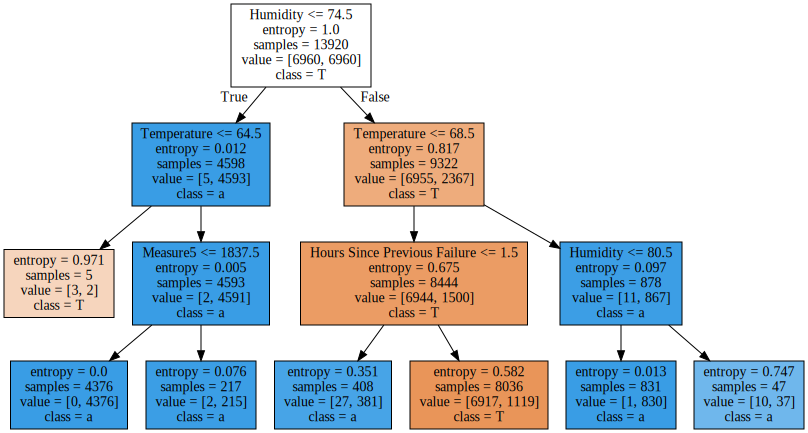

In [81]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree1,out_file=None,feature_names=col, class_names= 'Target_label_encoded', filled = True) 
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

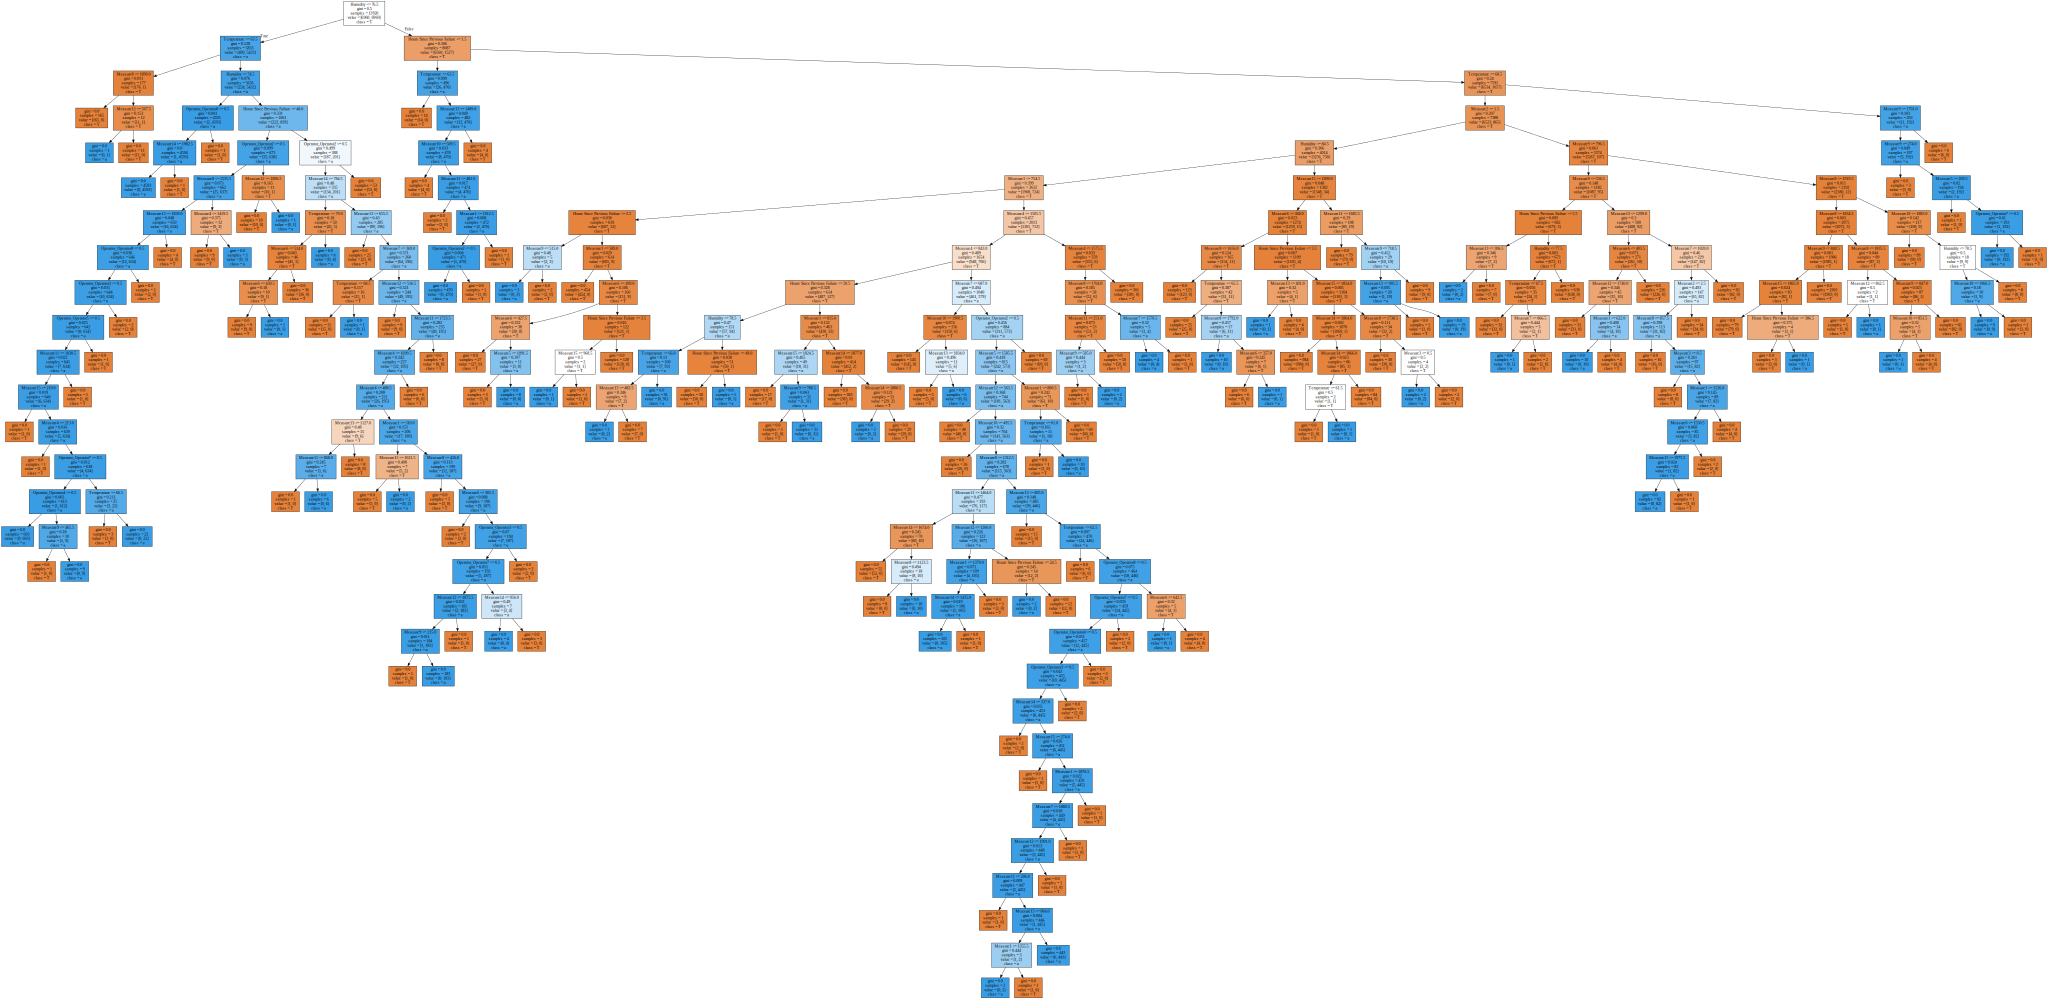

In [82]:
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=col, class_names= 'Target_label_encoded', filled = True) 
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### 10. Decision Tree with Class weight and Entropy

> Indented block



#### 10.1 Build Model                                          

In [83]:
def tree():
    dtree2 = DecisionTreeClassifier(class_weight={1:700},criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree2 = tree()

In [84]:
def tree():
    return dtree2.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 10.2 Prediction using Model                                          

In [85]:
predictions_new1 = pd.DataFrame()
def tree():
    predictions_new1 = dtree2.predict(X_testlr)
    return predictions_new1
predictions_new1 = tree()

#### 10.3 Model Evaluation                                          

In [86]:
predictions_new1=pd.DataFrame(predictions_new1,columns=['outcome'])
predictions_new1.head(3)

,outcome
0,0
1,0
2,0


In [87]:
a = pd.DataFrame(dtree2.predict_proba(X_testlr)[:,1],columns=['proba'])
a

,proba
0,0.139248
1,0.139248
2,0.139248
3,0.139248
4,0.139248
...,...
1752,0.139248
1753,0.139248
1754,0.139248
1755,0.139248


In [88]:
predictions_new1=predictions_new1.join(a, lsuffix="_left", rsuffix="_right")
predictions_new1.head(3)

,outcome,proba
0,0,0.139248
1,0,0.139248
2,0,0.139248


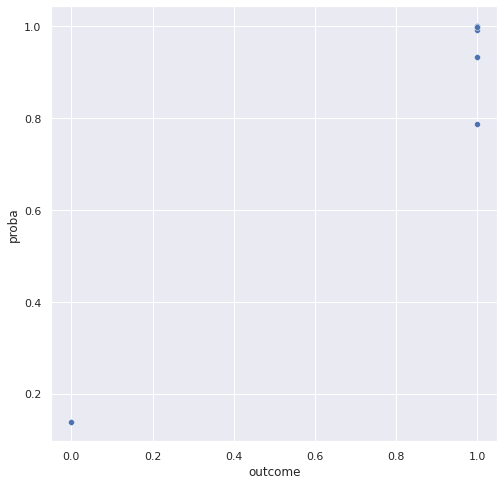

In [89]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = predictions_new1, x='outcome', y='proba')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



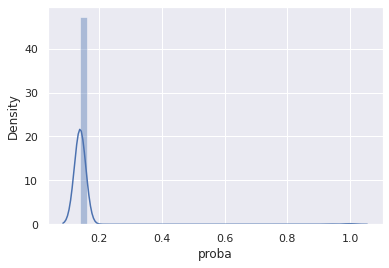

In [90]:
sns.distplot(predictions_new1['proba'])

In [91]:
predictions_new1.groupby(['outcome'])['outcome'].count()

outcome
0    1740
1    17  
Name: outcome, dtype: int64

In [92]:
predictions_new1[predictions_new1['proba']>0.15].count()

outcome    17
proba      17
dtype: int64

In [93]:
threshold = 0.1385 # You can play on this value (default is 0.5)
predictions_new1["pred"] = predictions_new1["proba"].apply(lambda el: 1.0 if el >= threshold else 0.0)

In [94]:
from sklearn.metrics import confusion_matrix
def tree():
    print(confusion_matrix(y_testlr, predictions_new1["pred"]))
tree()

[[   0 1743]
 [   0   14]]


In [95]:
from sklearn.metrics import recall_score
def log():
    recall3 = recall_score(y_testlr, predictions_new1["pred"])
    print('Recall score for test data is:', recall2)
    return recall3
recall3 = log()

Recall score for test data is: 0.7142857142857143


In [96]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_testlr, predictions_new1["pred"]))
tree()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1743
           1       0.01      1.00      0.02        14

    accuracy                           0.01      1757
   macro avg       0.00      0.50      0.01      1757
weighted avg       0.00      0.01      0.00      1757



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### 11. RandomSearchCV on RF

#### 11.1 Build Model                                          

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
#model
rf_classifier = RandomForestClassifier() 
#Implemente RandomSearchCV
m_params = { 
            "RF": {
                    "n_estimators" : np.linspace(2, 500, 500, dtype = "int"),  
                    "max_depth": [5, 20, 30, None], 
                    "min_samples_split": np.linspace(2, 50, 50, dtype = "int"),  
                    "max_features": ["sqrt", "log2",10, 20, None],
                    "oob_score": [True],
                    "bootstrap": [True]
                    },
            }
scoreFunction = {"recall": "recall", "precision": "precision"}
random_search = RandomizedSearchCV(rf_classifier,
                                       param_distributions = m_params["RF"], 
                                       n_iter = 20,
                                       scoring = scoreFunction,               
                                       refit = "recall",
                                       return_train_score = True,
                                       random_state = 42,
                                       cv = 5,
                                      verbose = 2 ) 
#trains and optimizes the model
random_search.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True, total=  25.9s
[CV] oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.3s remaining:    0.0s


[CV]  oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True, total=  24.7s
[CV] oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True 
[CV]  oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True, total=  25.9s
[CV] oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True 
[CV]  oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True, total=  25.1s
[CV] oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True 
[CV]  oob_score=True, n_estimators=459, min_samples_split=44, max_features=None, max_depth=5, bootstrap=True, total=  25.9s
[CV] oob_score=True, n_estimators=368, min_samples_split=44, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  oob_score=True, n_estimators=368, min_samples_split=44, max_f

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 26.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [98]:
#recover the best model
model_rf_tuned = random_search.best_estimator_
model_rf_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=168,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
model_rf_tuned.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=168,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

#### 11.2 Prediction using Model                                          

In [100]:
y_pred_test1 = model_rf_tuned.predict(X_testlr)
y_pred_train1 = model_rf_tuned.predict(df_Xosmpl)

#### 11.3 Model Evaluation                                          

In [101]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(df_yosmpl,y_pred_train1))
print('Accuracy score for test data is:', accuracy_score(y_testlr,y_pred_test1))

Accuracy score for train data is: 1.0
Accuracy score for test data is: 0.9965850882185544


In [102]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_testlr, y_pred_test1))

confusion_matrix.index = ['Actual not failed','Actual Failed']
confusion_matrix.columns = ['Predicted not failed','Predicted Failed']
print(confusion_matrix)

                   Predicted not failed  Predicted Failed
Actual not failed  1742                  1               
Actual Failed      5                     9               


In [103]:
def dt_new():
    print(classification_report(y_testlr,y_pred_test1))
dt_new()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       0.90      0.64      0.75        14

    accuracy                           1.00      1757
   macro avg       0.95      0.82      0.87      1757
weighted avg       1.00      1.00      1.00      1757



In [104]:
from sklearn.metrics import precision_score
def pre():
    precision1 = precision_score(y_testlr,y_pred_test1)
    print('Precision score for test data is:', precision1)
    return precision1
precision1 = pre()

Precision score for test data is: 0.9


In [105]:
from sklearn.metrics import recall_score
def pre():
    print('Recall score for test data is:',recall_score(y_testlr,y_pred_test1))
pre()

Recall score for test data is: 0.6428571428571429


In [106]:
from sklearn.metrics import f1_score
def pre():
    print('F1_score for test data is:',f1_score(y_testlr,y_pred_test1))
pre()

F1_score for test data is: 0.75


In [107]:
from sklearn import metrics
def pre():
    probs = model_rf_tuned.predict_proba(X_testlr)
    pred = probs[:,1]
    fpr1, tpr1, threshold = metrics.roc_curve(y_testlr,y_pred_test1)
    roc_auc1 = metrics.auc(fpr1, tpr1)
    return roc_auc1
pre()

0.8211417096959266

### 12. Model Evaluation among all the employed model

#### 12.1 Precision-Recall Curve and Classification Report                                          

In [108]:
# predict probabilities
rfcnew_probs = model_rf_tuned.predict_proba(X_testlr)
lr_probs = logreg.predict_proba(X_testlr)
dt_probs = dtree.predict_proba(X_testlr)
dt1_probs = dtree1.predict_proba(X_testlr)
dt2_probs = dtree2.predict_proba(X_testlr)
rfc_probs = rfc.predict_proba(X_testlr)
rfc1_probs = rfc_new.predict_proba(X_testlr)
# keep probabilities for the positive outcome only
rfcnew_probs = rfcnew_probs[:, 1]
lr_probs = lr_probs[:, 1]
dt_probs = dt_probs[:, 1]
dt1_probs = dt1_probs[:, 1]
dt2_probs = dt2_probs[:, 1]
rfc_probs = rfc_probs[:, 1]
rfc1_probs = rfc1_probs[:, 1]

In [109]:
from sklearn.metrics import precision_recall_curve
# calculate precision and recall for each threshold
rfcnew_precision, rfcnew_recall, _ = precision_recall_curve(y_testlr, rfcnew_probs)
lr_precision, lr_recall, _ = precision_recall_curve(y_testlr, lr_probs)
dt_precision, dt_recall, _ = precision_recall_curve(y_testlr, dt_probs)
dt1_precision, dt1_recall, _ = precision_recall_curve(y_testlr, dt1_probs)
dt2_precision, dt2_recall, _ = precision_recall_curve(y_testlr, dt2_probs)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_testlr, rfc_probs)
rfc1_precision, rfc1_recall, _ = precision_recall_curve(y_testlr, rfc1_probs)

In [110]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import auc
# calculate scores
lr_f1, lr_auc = fbeta_score(y_testlr, y_pred_test,average='weighted', beta=2), auc(lr_recall, lr_precision)
rfcnew_f1, rfcnew_auc = fbeta_score(y_testlr, y_pred_test1,average='weighted', beta=2), auc(rfcnew_recall, rfcnew_precision)
dt_f1, dt_auc = fbeta_score(y_testlr, predictions,average='weighted', beta=2), auc(dt_recall, dt_precision)
dt1_f1, dt1_auc = fbeta_score(y_testlr, predictions_new,average='weighted', beta=2), auc(dt1_recall, dt1_precision)
dt2_f1, dt2_auc = fbeta_score(y_testlr, predictions_new1.outcome,average='weighted', beta=2), auc(dt1_recall, dt2_precision)
rfc_f1, rfc_auc = fbeta_score(y_testlr, predictions1,average='weighted', beta=2), auc(rfc_recall, rfc_precision)
rfc1_f1, rfc1_auc = fbeta_score(y_testlr, new_predictions,average='weighted', beta=2), auc(rfc1_recall, rfc1_precision)
# summarize scores
print('LR: f2=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('RF Tuned: f2=%.3f auc=%.3f' % (rfcnew_f1, rfcnew_auc))
print('DT gini: f2=%.3f auc=%.3f' % (dt_f1, dt_auc))
print('DT entropy: f2=%.3f auc=%.3f' % (dt1_f1, dt1_auc))
print('DT_class_weighted_entropy: f2=%.3f auc=%.3f' % (dt2_f1, dt2_auc))
print('RF gini: f2=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
print('RF entropy: f2=%.3f auc=%.3f' % (rfc1_f1, rfc1_auc))

LR: f2=0.937 auc=0.510
RF Tuned: f2=0.996 auc=0.699
DT gini: f2=0.989 auc=0.503
DT entropy: f2=0.994 auc=0.782
DT_class_weighted_entropy: f2=0.994 auc=0.782
RF gini: f2=0.997 auc=0.709
RF entropy: f2=0.996 auc=0.718


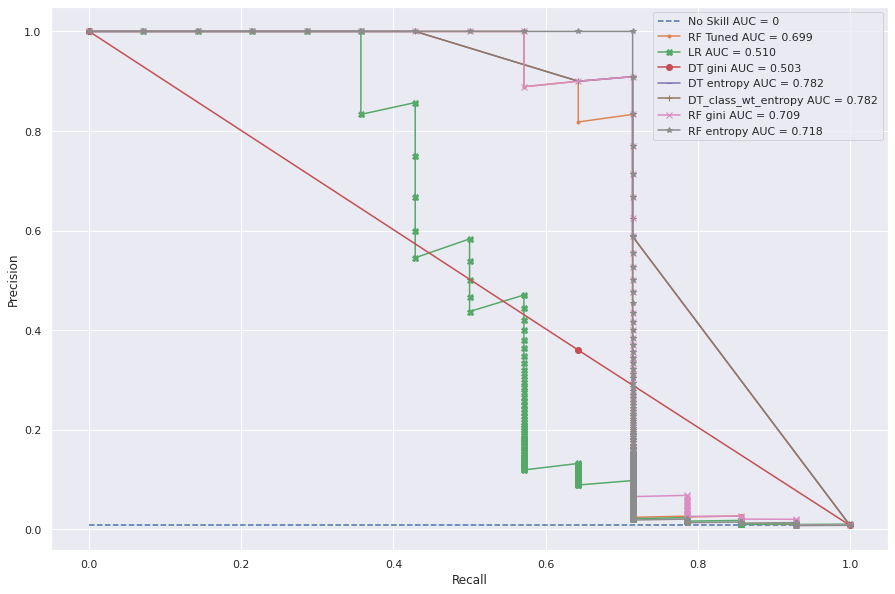

Class=1 fraction in test data is: 0.00796812749003984


In [111]:
from matplotlib import pyplot
# plot the precision-recall curves
plt.figure(figsize=(15,10))
no_skill = len(y_testlr[y_testlr==1]) / len(y_testlr)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill AUC = 0')
pyplot.plot(rfcnew_recall, rfcnew_precision, marker='.', label='RF Tuned AUC = %0.3f' % rfcnew_auc)
pyplot.plot(lr_recall, lr_precision, marker='X', label='LR AUC = %0.3f' % lr_auc)
pyplot.plot(dt_recall, dt_precision, marker='o', label='DT gini AUC = %0.3f' % dt_auc)
pyplot.plot(dt1_recall, dt1_precision, marker='_', label='DT entropy AUC = %0.3f' % dt1_auc)
pyplot.plot(dt2_recall, dt2_precision, marker='+', label='DT_class_wt_entropy AUC = %0.3f' % dt2_auc)
pyplot.plot(rfc_recall, rfc_precision, marker='x', label='RF gini AUC = %0.3f' % rfc_auc)
pyplot.plot(rfc1_recall, rfc1_precision, marker='*', label='RF entropy AUC = %0.3f' % rfc1_auc)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("Class=1 fraction in test data is:",no_skill)

#### 12.2 ROC-AUC Curve and compare against no skill model                                          

In [112]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_testlr))]

In [113]:
from sklearn.metrics import roc_auc_score
# calculate scores
ns_roc_auc = roc_auc_score(y_testlr, ns_probs)
rfcnew_roc_auc = roc_auc_score(y_testlr, rfcnew_probs)
lr_roc_auc = roc_auc_score(y_testlr, lr_probs)
dt_roc_auc = roc_auc_score(y_testlr, dt_probs)
dt1_roc_auc = roc_auc_score(y_testlr, dt1_probs)
dt2_roc_auc = roc_auc_score(y_testlr, dt2_probs)
rfc_roc_auc = roc_auc_score(y_testlr, rfc_probs)
rfc1_roc_auc = roc_auc_score(y_testlr, rfc1_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_roc_auc))
print('RF Tuned: ROC AUC=%.3f' % (rfcnew_roc_auc))
print('LR: ROC AUC=%.3f' % (lr_roc_auc))
print('DT gini: ROC AUC=%.3f' % (dt_roc_auc))
print('DT entropy: ROC AUC=%.3f' % (dt1_roc_auc))
print('DT_class_wt_entropy: ROC AUC=%.3f' % (dt2_roc_auc))
print('RF gini: ROC AUC=%.3f' % (rfc_roc_auc))
print('RF entropy: ROC AUC=%.3f' % (rfc1_roc_auc))

No Skill: ROC AUC=0.500
RF Tuned: ROC AUC=0.855
LR: ROC AUC=0.846
DT gini: ROC AUC=0.817
DT entropy: ROC AUC=0.856
DT_class_wt_entropy: ROC AUC=0.856
RF gini: ROC AUC=0.887
RF entropy: ROC AUC=0.837


In [114]:
from sklearn.metrics import roc_curve
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_testlr, ns_probs)
rfcnew_fpr, rfcnew_tpr, _ = roc_curve(y_testlr, rfcnew_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_testlr, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_testlr, dt_probs)
dt1_fpr, dt1_tpr, _ = roc_curve(y_testlr, dt1_probs)
dt2_fpr, dt2_tpr, _ = roc_curve(y_testlr, dt2_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_testlr, rfc_probs)
rfc1_fpr, rfc1_tpr, _ = roc_curve(y_testlr, rfc1_probs)

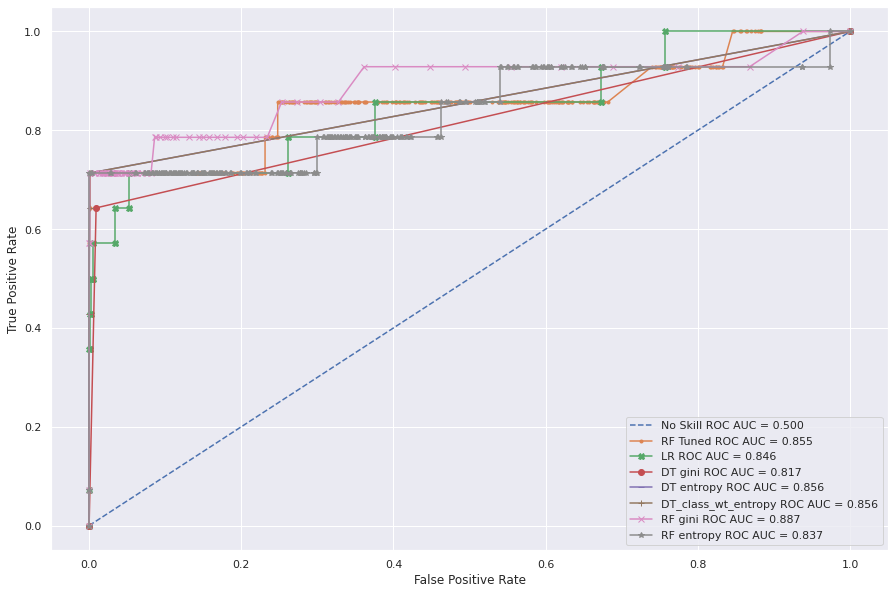

In [115]:
from matplotlib import pyplot
# plot the roc curve for the model
plt.figure(figsize=(15,10))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill ROC AUC = %0.3f' % ns_roc_auc)
pyplot.plot(rfcnew_fpr, rfcnew_tpr, marker='.', label='RF Tuned ROC AUC = %0.3f' % rfcnew_roc_auc)
pyplot.plot(lr_fpr, lr_tpr, marker='X', label='LR ROC AUC = %0.3f' % lr_roc_auc)
pyplot.plot(dt_fpr, dt_tpr, marker='o', label='DT gini ROC AUC = %0.3f' % dt_roc_auc)
pyplot.plot(dt1_fpr, dt1_tpr, marker='_', label='DT entropy ROC AUC = %0.3f' % dt1_roc_auc)
pyplot.plot(dt2_fpr, dt2_tpr, marker='+', label='DT_class_wt_entropy ROC AUC = %0.3f' % dt2_roc_auc)
pyplot.plot(rfc_fpr, rfc_tpr, marker='x', label='RF gini ROC AUC = %0.3f' % rfc_roc_auc)
pyplot.plot(rfc1_fpr, rfc1_tpr, marker='*', label='RF entropy ROC AUC = %0.3f' % rfc1_roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 12.3 Probability Value comparison of test dataset among all models                                          

In [116]:
matrix_proba=predictions_new1.copy()
matrix_proba.drop(columns=['pred'],axis=1,inplace=True)
matrix_proba.rename(columns = {'proba':'probaDTWeight'}, inplace = True)
matrix_proba.head(3)

,outcome,probaDTWeight
0,0,0.139248
1,0,0.139248
2,0,0.139248


In [117]:
a1 = pd.DataFrame(rfcnew_probs,columns=['proba_RFTuned'])
a2 = pd.DataFrame(lr_probs,columns=['proba_Logreg'])
a3 = pd.DataFrame(dt_probs,columns=['proba_DTGini'])
a4 = pd.DataFrame(dt1_probs,columns=['proba_DTEntropy'])
a5 = pd.DataFrame(rfc_probs,columns=['proba_RFGini'])
a6 = pd.DataFrame(rfc1_probs,columns=['proba_RFEntropy'])

In [118]:
ais = [a1,a2,a3,a4,a5,a6]
for a in ais:
  matrix_proba=matrix_proba.join(a, lsuffix="_left", rsuffix="_right")
matrix_proba.head(3)

,outcome,probaDTWeight,proba_RFTuned,proba_Logreg,proba_DTGini,proba_DTEntropy,proba_RFGini,proba_RFEntropy
0,0,0.139248,0.000000,0.382588,0.0,0.139248,0.000000,0.214526
1,0,0.139248,0.011905,0.184418,0.0,0.139248,0.011667,0.228442
2,0,0.139248,0.013922,0.251108,0.0,0.139248,0.013333,0.210202


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

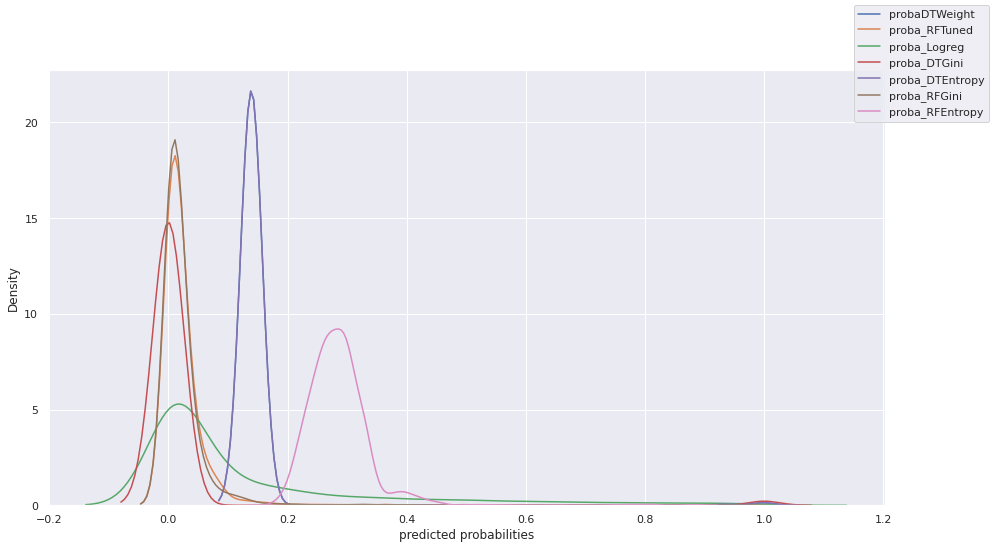

In [119]:
columns = matrix_proba.columns.tolist()
lgnds=[]
for c in columns:
    if c != 'outcome':
      lgnds.append(c)
fig = plt.figure(figsize=(15,8))
for p in range(2,9,1):
  sns.distplot(matrix_proba.iloc[:,p-1:p],hist=False,kde =True, axlabel= 'predicted probabilities')
fig.legend(labels=lgnds)
plt.show()

### 13. Cross Validation and Prediction with selected model

In [120]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
from sklearn.model_selection import cross_validate

In [122]:
cv_results_rf = cross_validate(rfc, X_trainlr,y_trainlr.values.reshape(-1,), cv=5, scoring='recall',verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   6.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] ................................................. , total=   5.5s
[CV]  ................................................................
[CV] ................................................. , total=   5.7s
[CV]  ................................................................
[CV] ................................................. , total=   5.8s
[CV]  ................................................................
[CV] ................................................. , total=   5.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.6s finished


In [123]:
cv_results_rf

{'fit_time': array([5.89731574, 5.41935229, 5.59214664, 5.67457032, 5.49133682]),
 'score_time': array([0.10245943, 0.1021266 , 0.10149479, 0.10363388, 0.10269237]),
 'test_score': array([0.78571429, 0.71428571, 0.69230769, 0.84615385, 0.61538462])}

In [124]:
cv_results_rf['test_score']

array([0.78571429, 0.71428571, 0.69230769, 0.84615385, 0.61538462])

In [125]:
cv_results_rf['test_score'].mean()

0.7307692307692308

In [126]:
cv_results_rf['test_score'].std()

0.07924288517503272

In [127]:
y_pred_test = rfc.predict(X_testlr)

In [128]:
test_predictions = X_testlr.copy()

In [129]:
test_predictions['actual'] = y_testlr
test_predictions['predicted'] = y_pred_test
test_predictions

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,actual,predicted
6279,67,82,1744,3,2,644,1599,1514,1957,1169,303,1468,1255,942,835,1308,815,262,0,1,0,0,0,0,0,0,0
1005,68,81,875,3,0,1964,1572,1325,220,1317,1119,946,2000,1290,1975,368,1812,338,0,0,0,0,0,0,1,0,0
8651,67,83,162,3,2,1302,438,691,1262,1448,1219,1025,1320,1652,571,1540,1272,58,0,1,0,0,0,0,0,0,0
5408,64,89,857,1,2,525,1789,1689,1903,1603,391,882,1609,1282,1930,217,381,290,0,1,0,0,0,0,0,0,0
7136,64,83,815,3,0,875,1287,1969,398,1067,1123,778,1036,1827,1209,1862,599,246,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,68,82,1047,3,0,1389,1242,1388,1762,1807,1386,1130,1564,1397,555,970,411,532,0,0,1,0,0,0,0,0,0
8524,61,77,587,3,2,1141,345,649,369,1179,1607,1160,1053,1723,1149,852,1308,342,1,0,0,0,0,0,0,0,0
2379,60,85,1568,2,1,555,1456,1572,1671,754,1837,475,370,738,1545,1727,1857,547,0,0,0,0,0,0,0,0,0
5997,67,82,1079,2,2,1380,1433,1248,1010,470,1611,1013,1845,1110,1612,1582,515,9,0,0,0,1,0,0,0,0,0


In [130]:
test_predictions.to_csv('test_predictions.csv')

In [131]:
from google.colab import files
files.download("test_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 14. Conclusion

- Model for binary classification with <1% minority class (“Yes” or “1”) has been built well with the help of SMOTE oversampling technique.

- Random Forest (with Gini) performed well and has been selected for this predictive maintenance case study.

- “Recall” achieved maximum 0.71 and it is expected that this can further be improved with Neural network based models.

- This case study can also be referred and used for similar type binary classification problem.
